## 課題学習
このセクションでは課題学習を扱う。
### 課題学習に必要なデータセット
- hoge
- hoge
- hoge
である。

In [13]:
!pip install japanize-matplotlib

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.patches as mpatches

In [18]:
# 世界気温のデータ
r_temp = pd.read_csv('https://raw.githubusercontent.com/tatchan-account/math_mogi/refs/heads/main/data/world_temp.csv')
r_temp = r_temp.rename(columns={'whole': 'wtemp'})
# 世界の電力消費量 <=> 世界の概算的排熱量
r_ene = pd.read_csv('https://raw.githubusercontent.com/tatchan-account/math_mogi/refs/heads/main/data/global-energy-substitution.csv')
r_ene = r_ene.rename(columns={'Year': 'year'})

w_temp = r_temp.iloc[:,[0,1]]
w_ene = r_ene.iloc[:,3:]

w_ene_new = r_ene.assign(total = w_ene.sum(axis=1))
w_ene_new = w_ene_new.iloc[:,[2,-1]]

m_data = pd.merge(w_ene_new,w_temp,how="outer",on="year")

filtered = m_data.dropna()

flt = filtered.iloc[:,1:3]
flt_mat = flt.to_numpy()
corr_val_m = flt.corr()
corr_val = corr_val_m.iloc[0,1]

# フランスの電力発電の時系列変化
df_fr = pd.read_csv('https://raw.githubusercontent.com/tatchan-account/math_mogi/refs/heads/main/data/france_production.csv', header = None)
df_fr = df_fr.T
title = ['year', 'fossil', 'nuclear', 'renewable', 'total']
for i in range(len(title)):
    df_fr = df_fr.rename(columns={i: title[i]})

df_fr = df_fr.iloc[1:len(df_fr)-1,:]

for i in range(len(title)):
    df_fr[title[i]] = pd.to_numeric(df_fr[title[i]], errors="coerce")

# 排熱の比率 原子力/火力
rat = 3
los = df_fr.iloc[:,0:3]
los['nuclear'] = los['nuclear'] * rat
los['total'] = los['nuclear'] + los['fossil']

los_if = df_fr.iloc[:,0:3]
los_if = los_if.rename(columns = {'nuclear' : 'thermal','fossil' : 'nuclear'})
los_if['total'] = rat * los_if['nuclear'] + los_if['thermal']

los_if = df_fr.iloc[:,0:3]
los_if = los_if.rename(columns = {'nuclear' : 'thermal','fossil' : 'nuclear'})
los_if['total'] = rat * los_if['nuclear'] + los_if['thermal']

In [20]:
'''
データの表示セクション
データを表示したい場合は、その行のコメントを解除してください
'''
#### 世界の気温と排熱量
# m_data # 欠損値あり
# flt # 欠損値なし
#### フランスの発電量の時系列変化
# df_fr
#### フランスの排熱量の時系列変化
# los
#### フランスの排熱量シミュレーション時系列変化
# los_if

'\nデータの表示セクション\nデータを表示したい場合は、その行のコメントを解除してください\n'

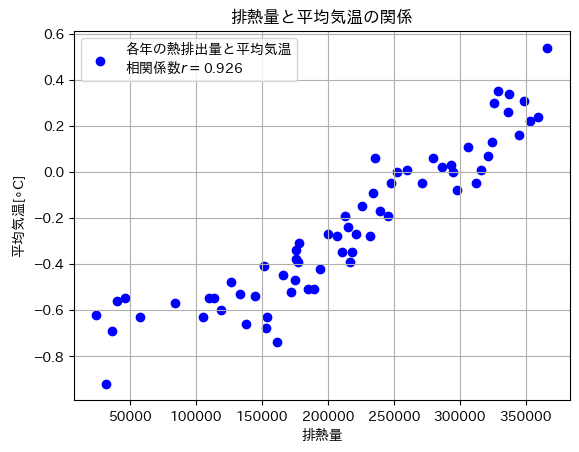

In [16]:
# グラフプロット(上のセクションの実行後に実行してください)
plt.scatter(flt_mat[:,0], flt_mat[:,1], color='blue', label='各年の熱排出量と平均気温\n相関係数$r=${:.3f}'.format(corr_val))

plt.title('排熱量と平均気温の関係')
plt.xlabel('排熱量')
plt.ylabel('平均気温[$\circ$C]')
plt.legend()
plt.grid(True)

plt.show()

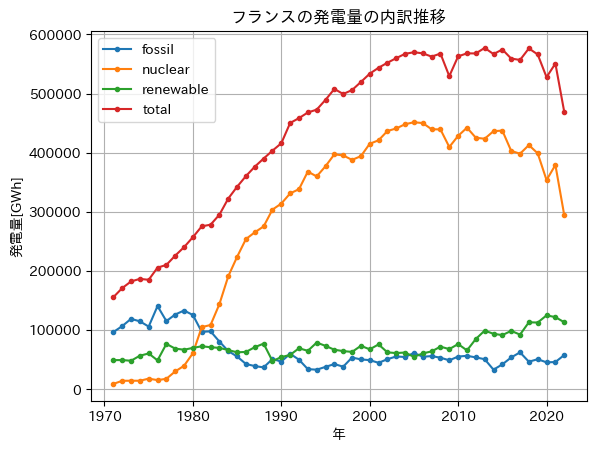

In [17]:
df_fr.plot(x='year', y=['fossil', 'nuclear', 'renewable', 'total'], kind="line", marker=".")

plt.title("フランスの発電量の内訳推移")
plt.xlabel("年")
plt.ylabel("発電量[GWh]")

plt.grid(True)
plt.legend()
plt.grid(True)

plt.show()

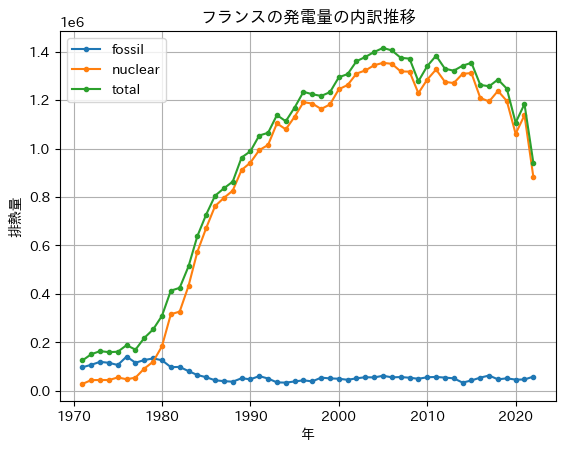

In [8]:
los.plot(x='year', y=['fossil', 'nuclear', 'total'], kind="line", marker=".")

plt.title("フランスの発電量の内訳推移")
plt.xlabel("年")
plt.ylabel("排熱量")
plt.grid(True)

plt.legend()
plt.grid(True)
plt.show()

### シミュレーションしてみよう！
シミュレーションによって。

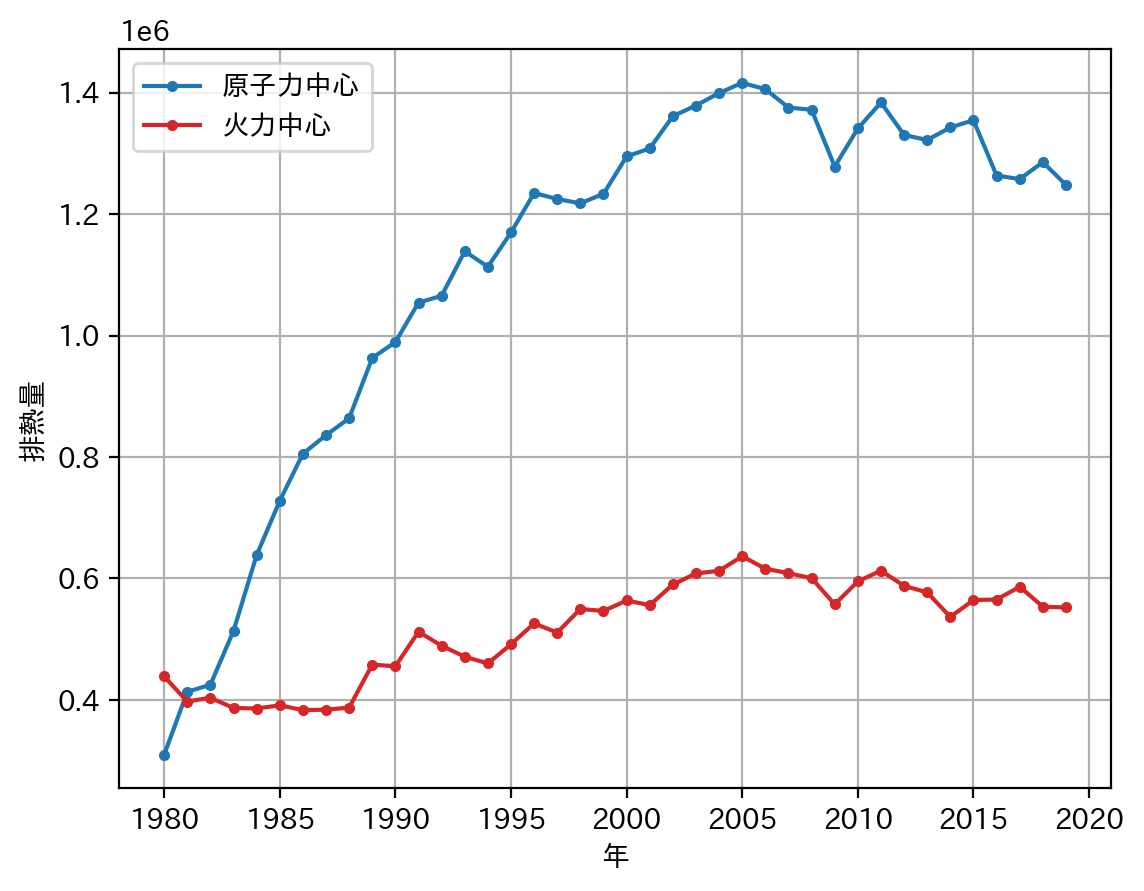

In [12]:
los_if_np = los_if.to_numpy()
los_np = los.to_numpy()

fig, ax = plt.subplots(dpi=200)
ax.plot(los_np[9:len(los_np)-3,0],    los_np[9:len(los_np)-3,3], '.-', color='tab:blue', label='原子力中心')
ax.plot(los_np[9:len(los_np)-3,0], los_if_np[9:len(los_np)-3,3], '.-', color='tab:red', label='火力中心')
ax.set_xlabel('年')
ax.set_ylabel('排熱量')
ax.grid()
ax.legend()
plt.show()

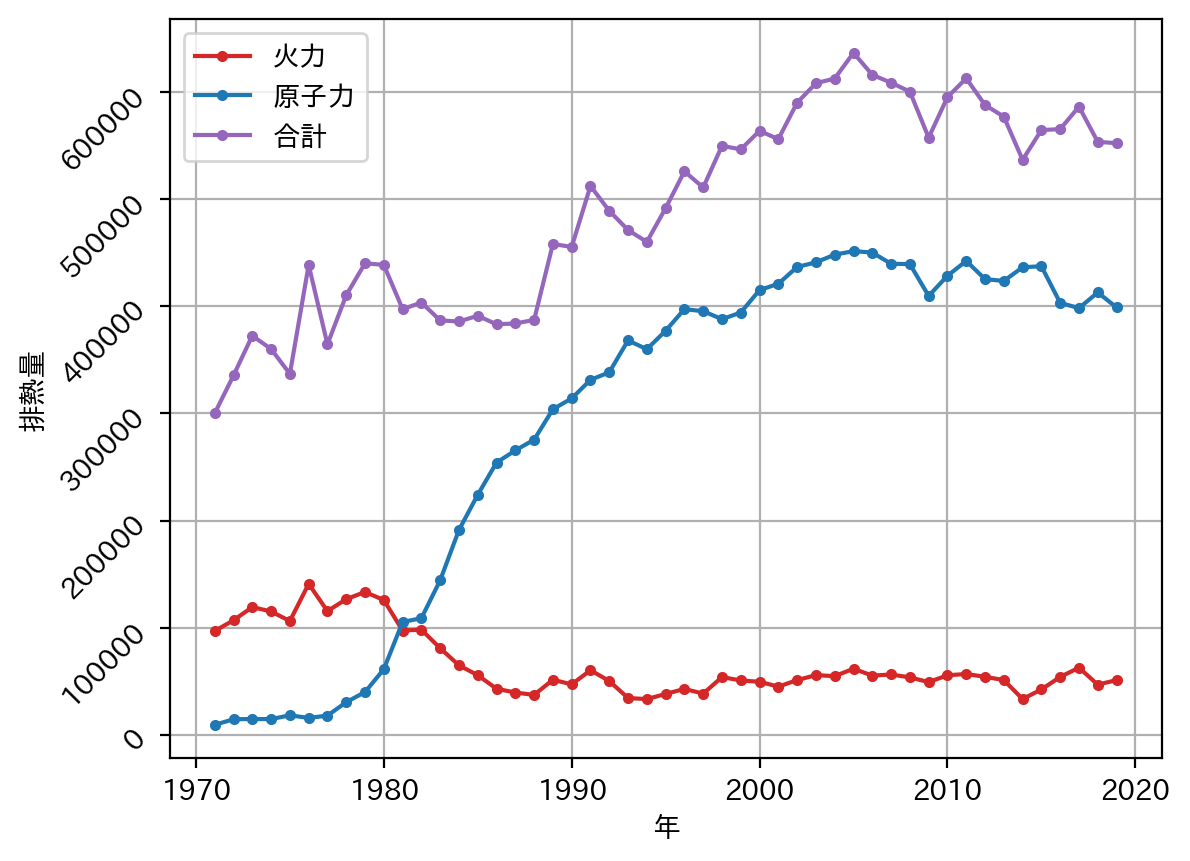

In [11]:
fig, ax = plt.subplots(dpi=200)
ax.plot(los_np[:len(los_np)-3,0],    los_np[:len(los_np)-3,1], '.-', color='tab:red', label='火力')
ax.plot(los_np[:len(los_np)-3,0], los_if_np[:len(los_np)-3,2], '.-', color='tab:blue', label='原子力')
ax.plot(los_np[:len(los_np)-3,0], los_if_np[:len(los_np)-3,3], '.-', color='tab:purple', label='合計')
ax.set_xlabel('年')
ax.set_ylabel('排熱量')
ax.tick_params(axis="y", labelrotation=45)
ax.grid()
ax.legend()
plt.show()